In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df["Trihalomethanes"].fillna(df["Trihalomethanes"].mode()[0], inplace=True)

In [7]:
# List of column names to drop
columns_to_drop = ['ph', 'Sulfate', 'Potability']

# Drop the specified columns along axis 1 (columns)
X = df.drop(columns=columns_to_drop, axis=1)
y = df['Potability']

In [8]:
X.head()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135
1,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656
2,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934
3,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771
4,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

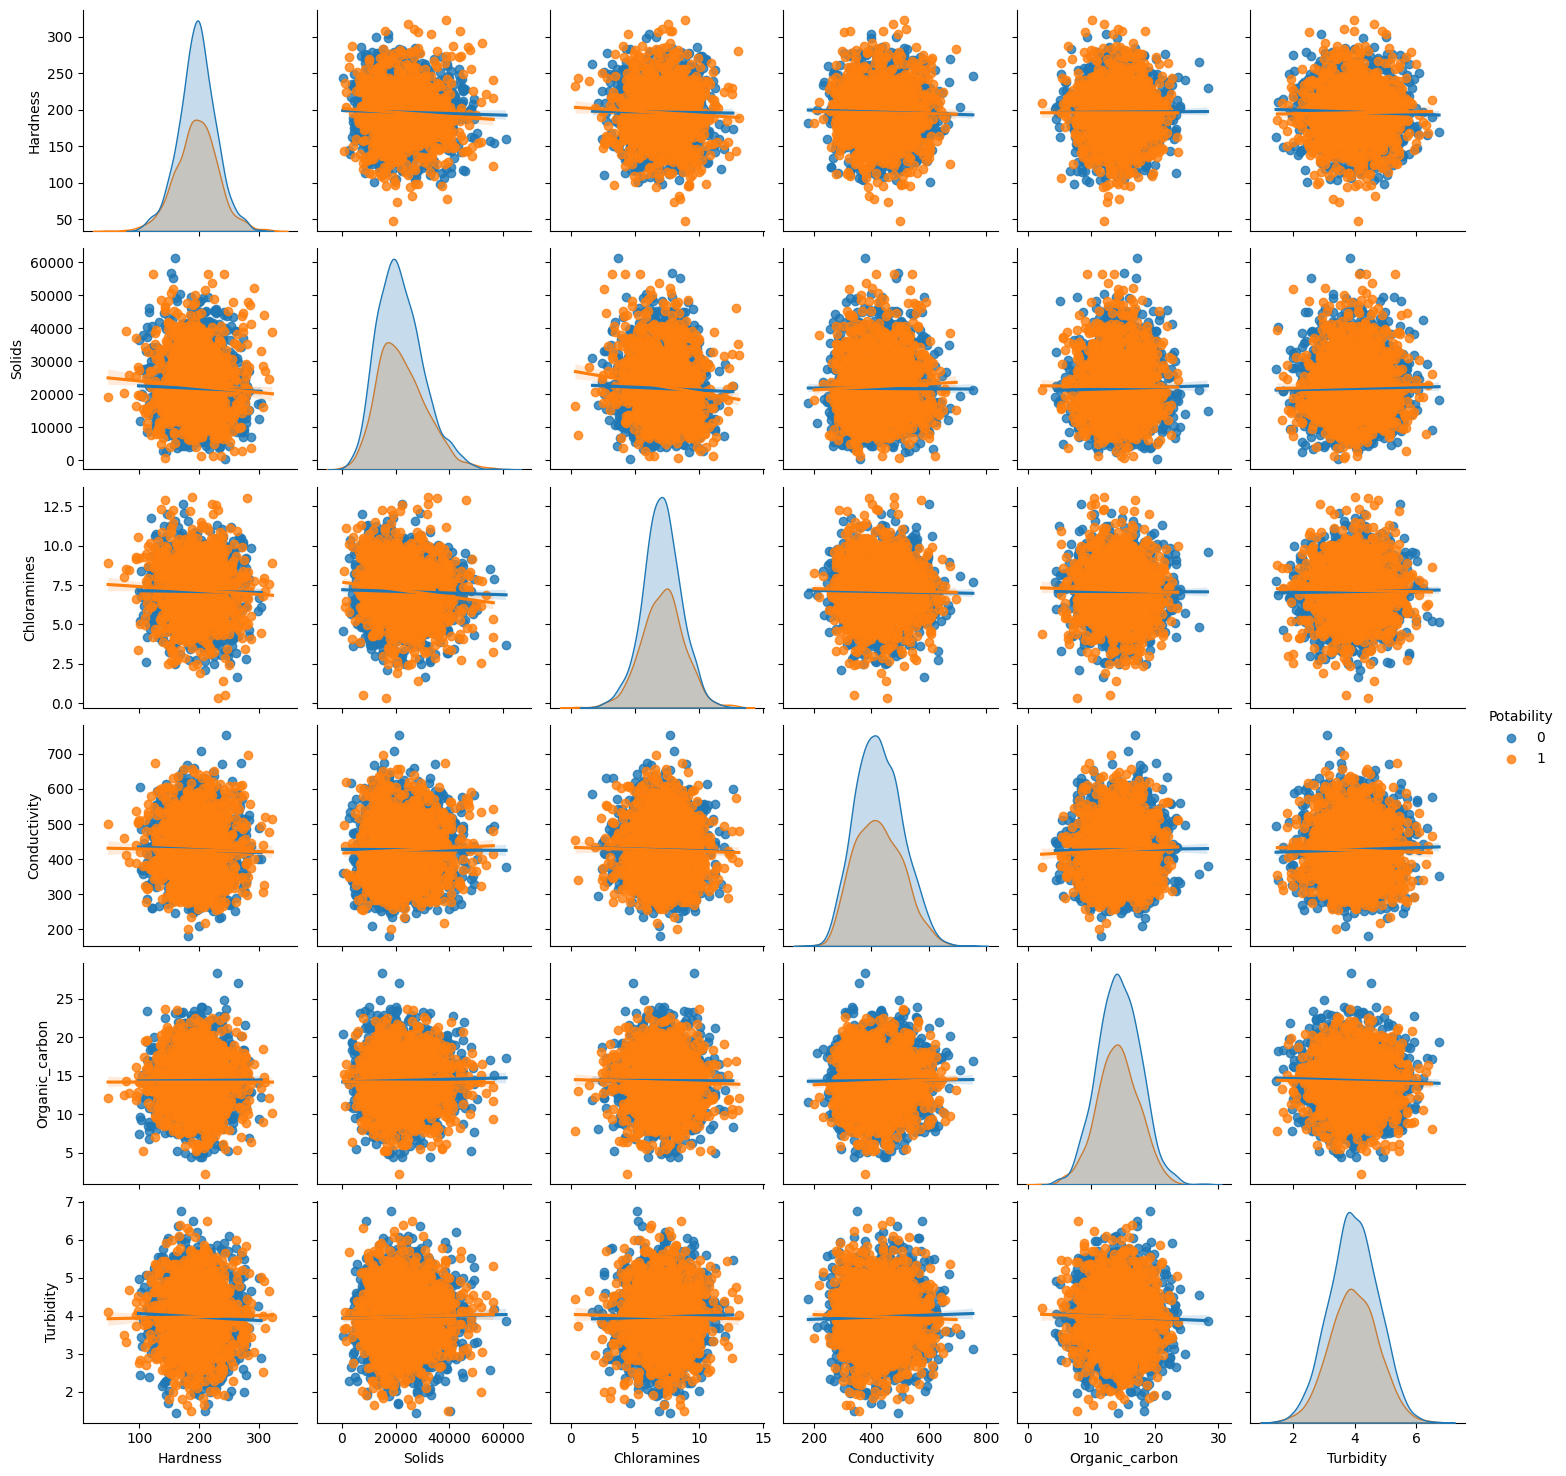

In [10]:
sns.pairplot(df.drop(columns=['ph', 'Sulfate', 'Trihalomethanes'], axis=1),kind='reg',hue='Potability')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X.describe()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,196.369496,22014.092526,7.122277,426.205111,14.284970,63.149454,3.966786
std,32.879761,8768.570828,1.583085,80.824064,3.308162,21.245963,0.780382
min,47.432000,320.942611,0.352000,181.483754,2.200000,0.738000,1.450000
25%,176.850538,15666.690297,6.127421,365.734414,12.065801,53.793688,3.439711
50%,196.967627,20927.833607,7.130299,421.884968,14.218338,65.445962,3.955028
75%,216.667456,27332.762127,8.114887,481.792304,16.557652,76.666609,4.500320
max,323.124000,61227.196008,13.127000,753.342620,28.300000,124.000000,6.739000


In [13]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
scaler.scale_

array([3.27987969e+01, 8.94295944e+03, 1.58404656e+00, 8.16159537e+01,
       3.28074650e+00, 2.12867855e+01, 7.77683448e-01])

In [16]:
# !pip install xgboost

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score

In [18]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print('accuracy score:', accuracy_score(y_test, y_pred))

accuracy score: 0.5702402957486137


In [19]:
#hyperparameter Tuning and cross validation
from sklearn.model_selection import GridSearchCV

In [20]:
xgb = XGBClassifier()
params = {'n_estimators': [300, 350, 400],
         'learning_rate': [0.01, 0.1, 1], 
         'max_depth': [1,2,3,4,5],
         'lambda': [3, 4, 5]}
grid = GridSearchCV(xgb, param_grid=params, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'lambda': [3, 4, 5], 'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [300, 350, 400]})

In [21]:
grid.best_params_, grid.best_score_

({'lambda': 5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 350},
 0.6025587418479109)

In [22]:
y_pred = grid.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))

accuracy: 0.6256931608133087


In [23]:
print('classification report\n', classification_report(y_test, y_pred))

classification report
               precision    recall  f1-score   support

           0       0.63      0.96      0.76       680
           1       0.47      0.06      0.11       402

    accuracy                           0.63      1082
   macro avg       0.55      0.51      0.44      1082
weighted avg       0.57      0.63      0.52      1082



In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

In [25]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)
print('accuracy:', accuracy_score(y_test, y_pred))

accuracy: 0.6173752310536045


<Figure size 600x600 with 0 Axes>

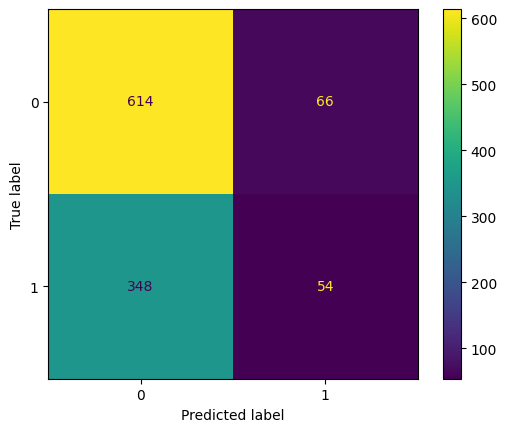

In [26]:
plt.figure(figsize=(6,6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [27]:
#hyperparameter Tuning and cross validation
from sklearn.model_selection import GridSearchCV

ada = AdaBoostClassifier()

params = {'n_estimators': [50, 100, 150, 200, 250],
         'learning_rate': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(ada, param_grid=params, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [28]:
grid.best_params_, grid.best_score_

({'learning_rate': 0.01, 'n_estimators': 200}, 0.6075690912305884)

In [29]:
y_pred = grid.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))

accuracy: 0.6284658040665434


In [30]:
print('classification report\n', classification_report(y_test, y_pred))

classification report
               precision    recall  f1-score   support

           0       0.63      0.99      0.77       680
           1       0.50      0.02      0.04       402

    accuracy                           0.63      1082
   macro avg       0.57      0.50      0.40      1082
weighted avg       0.58      0.63      0.50      1082



In [31]:
# !pip install catboost

In [32]:
from catboost import CatBoostClassifier

In [33]:
cat = CatBoostClassifier()
cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)

Learning rate set to 0.014409
0:	learn: 0.6919711	total: 149ms	remaining: 2m 28s
1:	learn: 0.6912117	total: 155ms	remaining: 1m 17s
2:	learn: 0.6902192	total: 161ms	remaining: 53.4s
3:	learn: 0.6891662	total: 167ms	remaining: 41.7s
4:	learn: 0.6883542	total: 173ms	remaining: 34.5s
5:	learn: 0.6876377	total: 179ms	remaining: 29.7s
6:	learn: 0.6867241	total: 186ms	remaining: 26.4s
7:	learn: 0.6858456	total: 192ms	remaining: 23.8s
8:	learn: 0.6849842	total: 198ms	remaining: 21.8s
9:	learn: 0.6843209	total: 204ms	remaining: 20.2s
10:	learn: 0.6834568	total: 209ms	remaining: 18.8s
11:	learn: 0.6826427	total: 215ms	remaining: 17.7s
12:	learn: 0.6820961	total: 219ms	remaining: 16.6s
13:	learn: 0.6813792	total: 223ms	remaining: 15.7s
14:	learn: 0.6806300	total: 227ms	remaining: 14.9s
15:	learn: 0.6799739	total: 230ms	remaining: 14.1s
16:	learn: 0.6793113	total: 233ms	remaining: 13.4s
17:	learn: 0.6786694	total: 235ms	remaining: 12.8s
18:	learn: 0.6779916	total: 239ms	remaining: 12.4s
19:	learn

167:	learn: 0.6170063	total: 706ms	remaining: 3.5s
168:	learn: 0.6167452	total: 710ms	remaining: 3.49s
169:	learn: 0.6164272	total: 713ms	remaining: 3.48s
170:	learn: 0.6160469	total: 716ms	remaining: 3.47s
171:	learn: 0.6157163	total: 720ms	remaining: 3.46s
172:	learn: 0.6154686	total: 723ms	remaining: 3.45s
173:	learn: 0.6152254	total: 726ms	remaining: 3.44s
174:	learn: 0.6150145	total: 729ms	remaining: 3.44s
175:	learn: 0.6148874	total: 732ms	remaining: 3.43s
176:	learn: 0.6146178	total: 735ms	remaining: 3.42s
177:	learn: 0.6143609	total: 738ms	remaining: 3.41s
178:	learn: 0.6140822	total: 741ms	remaining: 3.4s
179:	learn: 0.6138262	total: 744ms	remaining: 3.39s
180:	learn: 0.6136152	total: 747ms	remaining: 3.38s
181:	learn: 0.6131692	total: 750ms	remaining: 3.37s
182:	learn: 0.6128577	total: 753ms	remaining: 3.36s
183:	learn: 0.6125197	total: 756ms	remaining: 3.35s
184:	learn: 0.6122060	total: 759ms	remaining: 3.34s
185:	learn: 0.6119444	total: 762ms	remaining: 3.33s
186:	learn: 0.

327:	learn: 0.5758565	total: 1.19s	remaining: 2.44s
328:	learn: 0.5756857	total: 1.2s	remaining: 2.44s
329:	learn: 0.5755249	total: 1.2s	remaining: 2.44s
330:	learn: 0.5752856	total: 1.2s	remaining: 2.43s
331:	learn: 0.5751330	total: 1.21s	remaining: 2.43s
332:	learn: 0.5749759	total: 1.21s	remaining: 2.42s
333:	learn: 0.5748126	total: 1.21s	remaining: 2.42s
334:	learn: 0.5746621	total: 1.22s	remaining: 2.42s
335:	learn: 0.5744094	total: 1.22s	remaining: 2.41s
336:	learn: 0.5742080	total: 1.22s	remaining: 2.41s
337:	learn: 0.5740936	total: 1.23s	remaining: 2.4s
338:	learn: 0.5739043	total: 1.23s	remaining: 2.4s
339:	learn: 0.5736995	total: 1.23s	remaining: 2.39s
340:	learn: 0.5733770	total: 1.24s	remaining: 2.39s
341:	learn: 0.5731857	total: 1.24s	remaining: 2.38s
342:	learn: 0.5730206	total: 1.24s	remaining: 2.38s
343:	learn: 0.5726567	total: 1.25s	remaining: 2.38s
344:	learn: 0.5725140	total: 1.25s	remaining: 2.37s
345:	learn: 0.5723467	total: 1.25s	remaining: 2.37s
346:	learn: 0.571

515:	learn: 0.5372456	total: 1.8s	remaining: 1.69s
516:	learn: 0.5370744	total: 1.8s	remaining: 1.69s
517:	learn: 0.5368893	total: 1.81s	remaining: 1.68s
518:	learn: 0.5366629	total: 1.81s	remaining: 1.68s
519:	learn: 0.5365008	total: 1.81s	remaining: 1.67s
520:	learn: 0.5363627	total: 1.81s	remaining: 1.67s
521:	learn: 0.5361489	total: 1.82s	remaining: 1.67s
522:	learn: 0.5359504	total: 1.82s	remaining: 1.66s
523:	learn: 0.5356245	total: 1.82s	remaining: 1.66s
524:	learn: 0.5353357	total: 1.83s	remaining: 1.65s
525:	learn: 0.5352135	total: 1.83s	remaining: 1.65s
526:	learn: 0.5349561	total: 1.83s	remaining: 1.65s
527:	learn: 0.5347421	total: 1.84s	remaining: 1.64s
528:	learn: 0.5345513	total: 1.84s	remaining: 1.64s
529:	learn: 0.5343218	total: 1.84s	remaining: 1.63s
530:	learn: 0.5339050	total: 1.84s	remaining: 1.63s
531:	learn: 0.5335620	total: 1.85s	remaining: 1.63s
532:	learn: 0.5333448	total: 1.85s	remaining: 1.62s
533:	learn: 0.5331860	total: 1.85s	remaining: 1.62s
534:	learn: 0.

704:	learn: 0.4997329	total: 2.38s	remaining: 997ms
705:	learn: 0.4995787	total: 2.38s	remaining: 993ms
706:	learn: 0.4993873	total: 2.39s	remaining: 990ms
707:	learn: 0.4991837	total: 2.39s	remaining: 987ms
708:	learn: 0.4989590	total: 2.4s	remaining: 983ms
709:	learn: 0.4987743	total: 2.4s	remaining: 980ms
710:	learn: 0.4985095	total: 2.4s	remaining: 976ms
711:	learn: 0.4983479	total: 2.4s	remaining: 973ms
712:	learn: 0.4981848	total: 2.41s	remaining: 970ms
713:	learn: 0.4980968	total: 2.41s	remaining: 966ms
714:	learn: 0.4979286	total: 2.42s	remaining: 963ms
715:	learn: 0.4977618	total: 2.42s	remaining: 960ms
716:	learn: 0.4975531	total: 2.42s	remaining: 956ms
717:	learn: 0.4972669	total: 2.43s	remaining: 953ms
718:	learn: 0.4971877	total: 2.43s	remaining: 950ms
719:	learn: 0.4970221	total: 2.43s	remaining: 946ms
720:	learn: 0.4967672	total: 2.44s	remaining: 943ms
721:	learn: 0.4965738	total: 2.44s	remaining: 940ms
722:	learn: 0.4963966	total: 2.44s	remaining: 937ms
723:	learn: 0.49

889:	learn: 0.4644780	total: 2.98s	remaining: 368ms
890:	learn: 0.4643257	total: 2.98s	remaining: 365ms
891:	learn: 0.4641040	total: 2.98s	remaining: 361ms
892:	learn: 0.4639271	total: 2.99s	remaining: 358ms
893:	learn: 0.4637175	total: 2.99s	remaining: 354ms
894:	learn: 0.4634213	total: 2.99s	remaining: 351ms
895:	learn: 0.4632098	total: 3s	remaining: 348ms
896:	learn: 0.4630917	total: 3s	remaining: 344ms
897:	learn: 0.4629118	total: 3s	remaining: 341ms
898:	learn: 0.4628052	total: 3s	remaining: 338ms
899:	learn: 0.4626433	total: 3.01s	remaining: 334ms
900:	learn: 0.4624185	total: 3.01s	remaining: 331ms
901:	learn: 0.4622509	total: 3.01s	remaining: 327ms
902:	learn: 0.4620166	total: 3.02s	remaining: 324ms
903:	learn: 0.4619454	total: 3.02s	remaining: 321ms
904:	learn: 0.4617424	total: 3.02s	remaining: 318ms
905:	learn: 0.4615146	total: 3.03s	remaining: 314ms
906:	learn: 0.4613624	total: 3.03s	remaining: 311ms
907:	learn: 0.4612717	total: 3.03s	remaining: 307ms
908:	learn: 0.4611595	to

In [34]:
accuracy_score(y_test, y_pred)

0.6173752310536045

In [35]:
# # hyperparameter optimization
# cat = CatBoostClassifier()
# params = {'n_estimators': [50, 100, 150, 200, 250],
#          'learning_rate': [0.001, 0.01, 0.1, 1],
#          'depth': [1, 5, 10, 15, 20]}

# grid = GridSearchCV(cat, param_grid=params, cv=5, n_jobs=-1)
# grid.fit(X_train, y_train)

In [36]:
# grid.best_params_,grid.best_score_

In [37]:
# y_pred = grid.predict(X_test)
# accuracy_score(y_test, y_pred)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [39]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [40]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       680
           1       0.40      0.43      0.41       402

    accuracy                           0.55      1082
   macro avg       0.53      0.53      0.53      1082
weighted avg       0.56      0.55      0.56      1082



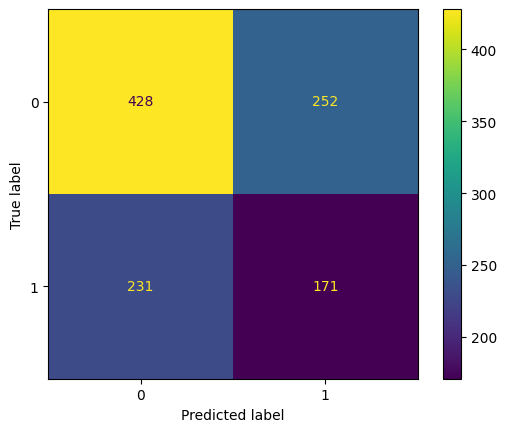

In [41]:
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
params = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'],
         'max_depth': [1,2,3, None]}

In [44]:
dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, param_grid=params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, None],
                         'splitter': ['best', 'random']})

In [45]:
grid.best_estimator_, grid.best_score_

(DecisionTreeClassifier(max_depth=1, splitter='random'), 0.6020979602874943)

In [46]:
y_predict = grid.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       680
           1       0.75      0.01      0.01       402

    accuracy                           0.63      1082
   macro avg       0.69      0.50      0.39      1082
weighted avg       0.67      0.63      0.49      1082



In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

              precision    recall  f1-score   support

           0       0.64      0.85      0.73       680
           1       0.45      0.21      0.29       402

    accuracy                           0.61      1082
   macro avg       0.55      0.53      0.51      1082
weighted avg       0.57      0.61      0.57      1082



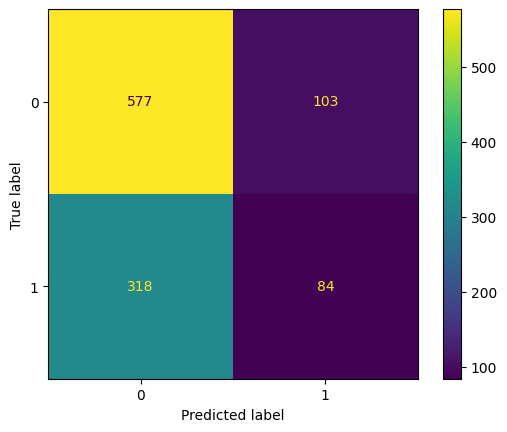

In [48]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

y_predict = rfc.predict(X_test)

print(classification_report(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(cm, display_labels=rfc.classes_)
disp.plot()
